<div class="alert alert-block alert-danger" style="color:black"><h2> THIS WORKBOOK IS ASSESSED</h2>
    Activity 4 is a task that brings together the work you will do in the rest of the notebook. It is worth 100 marks and there is a marking grid showing how marks are awarded.<br>
    As before, you will be submitting a file of python code for marking and  the notebooks use a two-stage process to help you.<br>
    As you work through activity 4 in the workbook:
    <ol>
        <li> <em>Jupyter <code>%%writefile</code> cell magics</em>  saves your code to a file"studentcode/student_wb5" as you run cells after editing</li>
        <li> Subsequent cells reload your code from that file to test the latest version .</li>
    </ol>
    <ol>
        <li> Restart the kernel and do a single run through of every cell in turn  so <code>studentcode/student_wb5.py</code> has no duplicated definitions.</li>
        <li> Run the notebook <b>wb5_selfchecker.ipynb</b> to check for syntax errors when called from our marking code, and edit as needed</li>
        <li>Download <code>studentcode/student_wb5.py</code> to your local machine. </li>
        <li> Follow the links in the <i>Assessments</i> folder on Blackboard to submit it for automatic marking and feedback.<br>
        </li>
        <li><b>Read the feedback provided</b> and use it to improve your work.<br>
            <b>You will have four attempts to submit each notebook.</b></li>
    </ol>
<h3> Important instructions about formatting your code cells</h3>
<ol>
   <li>Where you are asked to insert code, or to complete a code skeleton, <b>you must only put code where indicated</b>. <br>
       Otherwise the marking server - or the plagiarism detection we will run later - will not be able to parse and accept them.<br>
       So your code should only go:
       <ul> 
           <li><b>After</b> the lines marked <code># ====> insert your code below here </code></li>
           <li> <b>Before</b> the lines marked <code># <==== insert your code above here</code></li>
      </ul>
   </li>
    <li>The marking server will reject any files containing imports except "approvedimports".<br>
               The marking server has its own copy of that file, so there is no point editing the one we give you.</li>
<li>Even in comments you must not use any of these banned words: <em>system, read,import</li>
</ol>
</div>

# Workbook 5: Unsupervised Learning

Overview of activities and objectives of this workbook:

1. The first part of this workbook will create simple visualisations (plots) from a classic machine learning dataset.
    - The key first stage in any AI / Data science project is creating 'Data Visualisations' -- such as 2D and 3D scatter plots with different colourings to examine the relationships between the values of different features in your data set.
    - We will do this with the Iris data, which contains measurements of 150 different Iris flowers.

2. The second part of this workbook will introduce the unsupervised clustering algorithm 'k-Means'.
    - K-Means is run on the Iris data and we can examine the effect of different settings for parameters such as the number of clusters
    - We will use the industry-standard <code>scikit-learn</code> package to do unsupervised clustering.

3. The third part of this workbook will explore more sophisticated visualisations.
    - For example colouring points in a scatter plot according to what cluster they are assigned to.
    - In this part you will also create the file you submit for marking: by bringing together code snippets from activities 1-3.

<div style="background-color:black;width:100%;"></div>

# Part 1: Creating and adapting a simple data visualisation <img src="figures/Iris-image.png" style="float:right">

First we will load the Iris data. This is a classic Machine Learning Data set which contains:
- 4 measurements (features): sepal and petal width and length
- 50 examples from each sub-species for iris flowers (so, 150 total)
- 3 class labels: Iris-Virginica, Iris-Setosa or Iris-Versicolor

The next cell to imports some useful libraries and then loads the iris dataset into two arrays:
- <code>irisX</code> (the features - 150 rows x 4 columns)
- <code>irisy</code> (the class labels - For the purpose of this tutorial we are going to ignore the fact that we are provided with class labels)
- We'll also make a list of the <code>feature_names</code> so we can use them to label our plots.

In [6]:
# load the data
from sklearn.datasets import load_iris
import numpy as np

irisX, irisy = load_iris(return_X_y=True)
print(f'irisX is a {type(irisX)} with shape {irisX.shape}\n'
      f'irisy is a {type(irisy)} with shape {irisy.shape}\n')
feature_names = ['sepal width','sepal length','petal width','petal length']

# Print the first 5 rows of Iris data
print('Each row of irisX is a sample with the following features:')
print(feature_names)
print(irisX[:5])

irisX is a <class 'numpy.ndarray'> with shape (150, 4)
irisy is a <class 'numpy.ndarray'> with shape (150,)

Each row of irisX is a sample with the following features:
['sepal width', 'sepal length', 'petal width', 'petal length']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


## Create a scatter plot using the matplotlib library

We are making a 2D plot so we will just look at the first two features. We need to select these using numpy slicing (for a refresher on slicing take a look at workbook 1).

In [7]:
# Select every row and just the first|second column into two 1-D arrays for the x and y axes
# We're using variables to say what features we want for the x-axis and y-axis of the plot so we can change these easily
x_axis_feature = 0 
y_axis_feature = 1

x = irisX[:, x_axis_feature]
y = irisX[:, y_axis_feature]

# Print the first 5 rows of x and y values
print(feature_names[x_axis_feature])
print(x[:5])
print(feature_names[y_axis_feature])
print(y[:5])

sepal width
[5.1 4.9 4.7 4.6 5. ]
sepal length
[3.5 3.  3.2 3.1 3.6]


Now we have selected the data we can make a simple scatter plot.

To do this we'll call matplotlib.pyplot to create a canvas (fig) with a single subplot on it.
Now we have selected the data we can use matplotlib.pyplot to create a canvas (fig) with a single subplot on it.
- As you'll see later, you can use the same syntax to put multiple plots in a grid within one figure. This is because it's useful to separate:
    - 'global' properties for the whole picture (size, title)
    - properties for each subplot (ax) (x/y axis labels, subtitles etc)

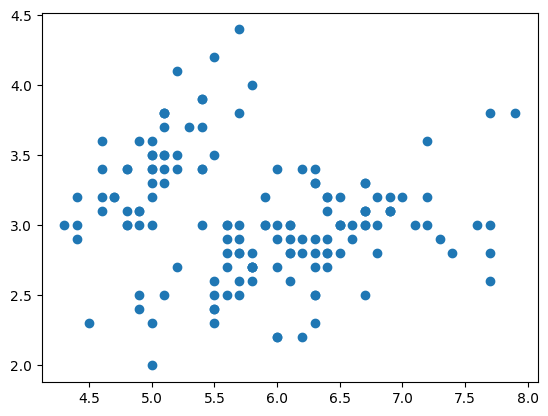

In [8]:
import matplotlib.pyplot as plt

# Create the canvas (fig) and the axes (ax) for the plot
fig, ax = plt.subplots()

# Create a scatter plot of x vs y
ax.scatter(x, y)

# Show the plot
plt.show()

Now lets add some 'decoration' to the plot so it is more informative.

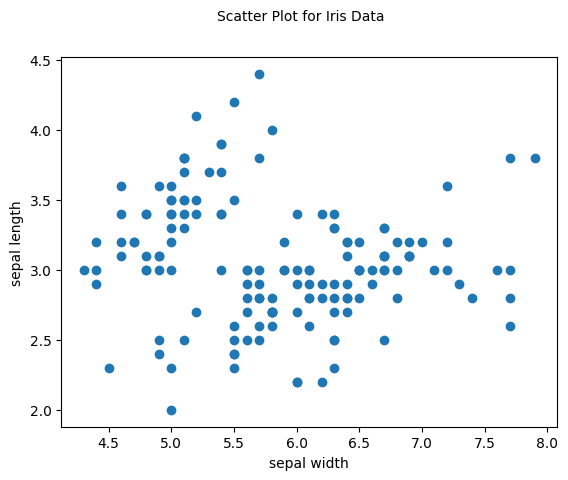

In [9]:
# Create the plot
fig,ax = plt.subplots()
ax.scatter(x, y)

# Lets start with a title
title = fig.suptitle("Scatter Plot for Iris Data", fontsize=10)

# Add some axis labels: recall we stored these in the list "feature_names" in case they were useful
ax.set_xlabel(feature_names[x_axis_feature], fontsize=10)
ax.set_ylabel(feature_names[y_axis_feature], fontsize=10)

# Show the plot
plt.show()

<div class="alert alert-block alert-info" style="color:black"><h2>Activity 1: Creating and formatting simple 2D visualisations</h2>
The cell below contains the all code used above to generate the scatter plot.
    <ol>
        <li>Edit the code to examine different combinations of features. For each combination of values <code>x_axis_feature</code> and <code>y_axis_feature</code> in the range [0, 3].
            <ul>
                <li>Edit the first two lines so that the combination is selected, then</li>
                <li>Run the changed version to examine the effect of looking at different combinations of variables (there are 12 altogether)</li>
            </ul>
        </li>
        <li>Next you can experiment with different formatting options. Currently this code example sets the overall title for the figure object, and the axis-labels, and their font sizes. But you could also experiment with:
            <ul>
                <li>Setting the total figure size with <code>plt.subplots(figsize=(10, 5))</code>. You will probably want to change these numbers to something appropriate to your screen.</li>
                <li>Changing the marker  style, colour, and size. For example try changing: <code>ax.scatter(x, y)</code> to <code>ax.scatter(x, y, c='red', marker='^', s=10)</code>. The default circle marker is 'o', try with other symbols such as: '.', 's', 'v', '+','x'.</li>
                <li>When you are happy you have found a plot that displays the data well, save your plot by adding the command <code>fig.savefig("your_filename.png")</code>. Obviously change the filename to something more informative such as the names of the features you are displaying.</li>
            </ul>
        </li>
        <li>Finally, when you are happy run the cell below that to answer the questions about the data and plots.</li>
    </ol>
</div>

<div class="alert alert-block alert-success" style="color:black"><b>Hints:</b>
    Matplotlib has many options for formatting plots:
    <ul>
        <li>You can find the documentation for scatter plots <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html">here.</a></li>
        <li><a href="https://www.w3schools.com/python/matplotlib_scatter.asp">W3 Schools also has a nice resource.</a></li>
    </ul>
</div>

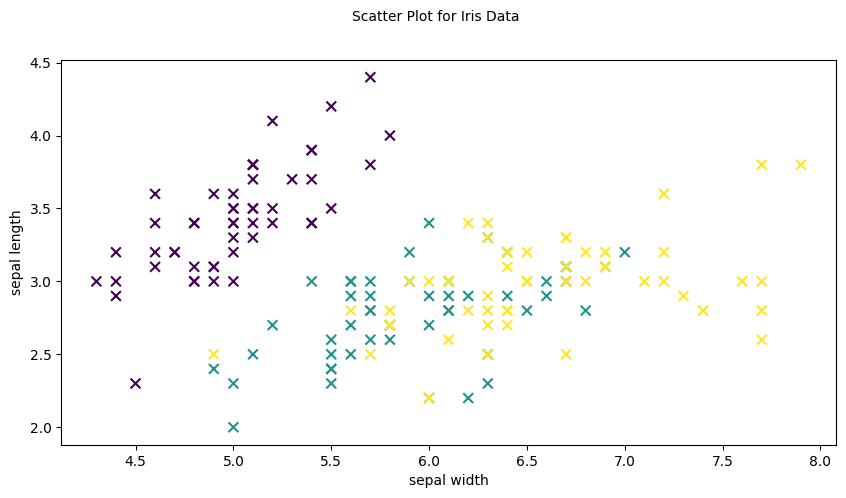

In [10]:
# Select the features to show
x_axis_feature = 0
y_axis_feature = 1
x = irisX[:, x_axis_feature]
y = irisX[:, y_axis_feature]

# Create the scatter plot and title
fig,ax = plt.subplots(figsize=(10, 5))
ax.scatter(x, y, c=irisy, cmap='viridis', s=50, marker='x')
title = fig.suptitle("Scatter Plot for Iris Data", fontsize=10)

# Add some axis labels: recall we stored these in the list "feature_names" in case they were useful
ax.set_xlabel(feature_names[x_axis_feature], fontsize=10)
ax.set_ylabel(feature_names[y_axis_feature], fontsize=10)

# Show the plot
plt.show()

# When you're happy add the savefig command here
fig.savefig('iris_plot.png')


In [ ]:
import workbook5_mcq
from IPython.display import display

display(workbook5_mcq.Q1)
display(workbook5_mcq.Q2)
display(workbook5_mcq.Q3)
display(workbook5_mcq.Q4)

<div style="background-color:black;width:100%;"></div>

# Part 2: Using the k-Means algorithm to discover clusters in the data

Work through the following cells to learn how to call and use sci-kit learn implementation of the k-means algorithm.

1. First we will call the constructor to instantiate the cluster model.
    - In this case we will create a kMeans model that just looks for two clusters using the `n_clusters` parameter.
    - The `n_init` parameters tells it how many different random initialisations to try. Effectively doing multiple local searches to improve the chance of finding a good local optimum.

2. Next we will 'fit' the model. in this case 'fitting' the model means finding the best cluster centres as described in the lecture.
    - Most of the ML models in sklearn provide both a `fit()` and a `predict()` method.

In [12]:
# Import the KMeans class from the sklearn library
from sklearn.cluster import KMeans

# Create a KMeans model with 2 clusters
cluster_model = KMeans(n_clusters=2, n_init=10)

# Fit the model to the data (find the clusters)
cluster_model.fit(irisX)

c:\Users\princ\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\princ\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\princ\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 546, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\princ\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1022, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

KMeans(n_clusters=2, n_init=10)

When the model was fitted to our data it stores the cluster centres it found as an attribute, so we will start by printing that.

- The outputs will be a 2d numpy array with one row for each cluster centre, and one column for each variable.
- In this case, the Iris data has four features to represent each of the examples. So each row represents the co-ordinates in 4d space of one the cluster centres.

In [13]:
# Note the use of 'implicit concantenation' of the strings being passed to print()
# and f-statements to print values via {}
# both these can make your code more readable

print( f"The fitted unsupervised models contains {cluster_model.n_clusters} clusters\n"
       f"The clusters centres are stored in a {type(cluster_model.cluster_centers_)} "
       f"of shape {cluster_model.cluster_centers_.shape}\n"
       f"This is the contents of that array:\n{cluster_model.cluster_centers_}"
      )

The fitted unsupervised models contains 2 clusters
The clusters centres are stored in a <class 'numpy.ndarray'> of shape (2, 4)
This is the contents of that array:
[[6.30103093 2.88659794 4.95876289 1.69587629]
 [5.00566038 3.36981132 1.56037736 0.29056604]]


Most classes of sklearn models implement a `predict()` method. For KMeans, that outputs the index of the nearest cluster center to each data point.

So the next cell calls the `predict()` method on our kMeans object, stores the result, then prints it out. The output will be a list with one `cluster_id'` for each example in the data set.
  - So if the Nth entry is a 0 it means that data item N has been assigned to (is "in") cluster 0.

In [15]:
# Create a KMeans model with 2 clusters
cluster_model = KMeans(n_clusters=2, n_init=10)

# Fit the model to the data (find the clusters)
cluster_model.fit(irisX)

# Make predictions for each data item
cluster_ids = cluster_model.predict(irisX)
print(f'This is the cluster to which each data item has been assigned by the model:\n{cluster_ids}') 

This is the cluster to which each data item has been assigned by the model:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


<div class="alert alert-block alert-info" style="color:black"><h2>Activity 2: Grouping and visualising unlabelled data using the kMeans Unsupervised Learning method</h2>
This activity is typical of many AI/Data science workflows in python, because we are going to combine snippets of code from different places.
    <ol>
        <li> Combine existing code to make a visualisation:
            <ul>
                <li>Copy the clustering code from the cell above into the cell below.</li>
                <li>Then copy your visualisation code from Activity 1 part 2, to produce what you think is the most 'informative' scatter plot (the best pair of features).</li>
                <li>Change the call to the plotting function from <code>ax.scatter(x, y)</code> to <code>ax.scatter(x, y,c=cluster_ids)</code> so that it use a different colour marker for each cluster.</li>
            </ul>
        </li>  
        <li>Change and rerun the code to investigate what happens if you specify 2,3,4,5 clusters using the <code>K</code> variable. Experiment with different values for K (number of clusters) to find the one that you think 'looks' a best fit to the data.</li>
    </ol>
</div>

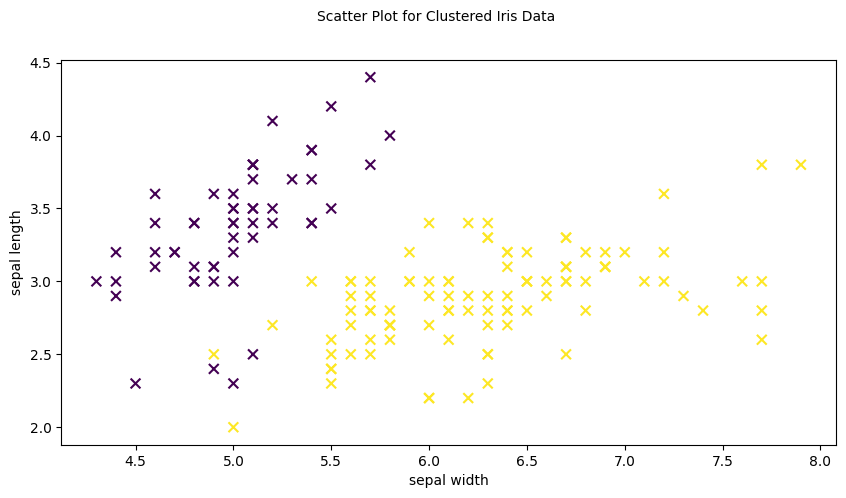

In [16]:
K = 5 # Chose the number of clusters (K)

# Copy the 3 lines of code here that creates a kmeans model, finds the clusters and reports the cluster_ids (labels)

# Create a KMeans model with 2 clusters
cluster_model = KMeans(n_clusters=2, n_init=10)

# Fit the model to the data (find the clusters)
cluster_model.fit(irisX)

# Make predictions for each data item
cluster_ids = cluster_model.predict(irisX)

# Copy your visualisation code from Activity 1 that makes a simple scatter plot here. Remember to change the call to ax.scatter() to use different coloured markers for different clusters

# Select the features to show
x_axis_feature = 0
y_axis_feature = 1
x = irisX[:, x_axis_feature]
y = irisX[:, y_axis_feature]

# Create the scatter plot and title
fig,ax = plt.subplots(figsize=(10, 5))
ax.scatter(x, y, c=cluster_ids, cmap='viridis', s=50, marker='x')
title = fig.suptitle("Scatter Plot for Clustered Iris Data", fontsize=10)

# Add some axis labels: recall we stored these in the list "feature_names" in case they were useful
ax.set_xlabel(feature_names[x_axis_feature], fontsize=10)
ax.set_ylabel(feature_names[y_axis_feature], fontsize=10)

# Show the plot
plt.show()

<div style="background-color:black;width:100%;"></div>

# Part 3: Making more complex visualisations with matplotlib

This part is designed to give you insights into how we go about creating richer visualisations. Work through the cells below: in places you will need to reuse variables you created above (e.g. `feature_names`)

Run the cell below to create a cluster model with the number of clusters you think best represent the data, that you found from the previous activity 2.

In [17]:
K = 3 # Chose the number of clusters (K)

# create the cluster labels
cluster_model = KMeans(n_clusters=K, n_init=10)
cluster_model.fit(irisX)
cluster_ids = cluster_model.predict(irisX)

<div class="alert alert-block alert-info" style="color:black"><h2>Activity 3: Showing the scatter plot matrix for your 'preferred' version of the data</h2>
The method defined below uses the power of matplotlib subplots to make a canvas (figure) containing a grid of plots (axes).
    <ol>
        <li>The method defined below uses the power of matplotlib subplots to make a canvas (figure) containing a grid of plots (axes).
            <ul>
                <li>It finds out how many features (columns) there are in the data from the parameter <code>X</code> then uses loops to plot all the different scatter plots in a grid.</li>
                <li>It also takes a second parameter <code>y</code> to colour the  markers.</li>
                <li>After defining the methods the next cell calls it for the Iris feature values and the cluster_ids we found with the cluster model.
            </ul>
        </li>  
        <li>Next edit the code in the next cell to show a histogram on the leading diagonal.
            <ul>
                <li>Change <code>ax[feature1, feature2].scatter(x_data, y_data, c=y)</code></li>
                <li>to <pre><code>if (feature1!=feature2):
    ax[feature1, feature2].scatter(x_data, y_data, c=y)
else:
    ax[feature1, feature2].hist(x_data)</code></pre></li>
                <li>You may need to consult <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html">the documentation for the <code>hist()</code> method</a>.</li>
            </ul>
        </li>
        <li><b>Stretch activity for the more experienced python programmers.</b>It would be nice if the histograms also had different colours for different cluster labels. To do that you need to split the Iris data into K subsets according to your clustered class labels, then either:
            <ul>
                <li>Make K separate calls to <code>hist()</code>. You could adapt code from the examples at the bottom of the matplotlib page linked above.</li>
                <li>or pass the K subsets as a list i.e. <code>ax[feature1, feature2].hist(x=(subset1, subset2, subset3))</code>.</li> 
            </ul>
        </li>
    </ol>
</div>

In [18]:
# Define a function that produces a set of scatter plots
def show_scatterplot_matrix(X, y, feature_names, title=None):

    # Find the number of features
    num_feat = X.shape[1]
    if(len(y) != X.shape[0]):
        print("Error, the y array must have the same length as there are rows in X")
        return
    
    # Create the plot with a grid of (num_feat) subplots
    fig, ax = plt.subplots(num_feat, num_feat, figsize=(12, 12))
    plt.set_cmap('viridis')  # set the color map to 'jet' for better visualisation
    
    # Get colours for histogram
    import matplotlib as mpl
    hist_col = plt.get_cmap('viridis', 3).colors

    # Loop over each pair of features
    for feature1 in range(num_feat):

        # Set the label for the axis
        ax[feature1, 0].set_ylabel(feature_names[feature1])
        ax[0, feature1].set_xlabel(feature_names[feature1])
        ax[0, feature1].xaxis.set_label_position('top') 

        for feature2 in range(num_feat):

            # Extract the data for the feature pairs
            x_data = X[:, feature1]
            y_data = X[:, feature2]

            if feature1 != feature2:
                ax[feature1, feature2].scatter(x_data, y_data, c=y)
            else:
                # Sort the labels and data so that the classes are in order
                inds = np.argsort(y)
                y = y[inds]
                x_data = x_data[inds]

                # Split the data into the different classes
                splits = np.split(x_data, np.unique(y, return_index=True)[1][1:])
                     
                # Plot the histogram
                for i, split in enumerate(splits):
                    ax[feature1, feature2].hist(split, bins=20, color=hist_col[i], edgecolor='black')

    # Add a title
    if title != None:
        fig.suptitle(title, fontsize=16, y=0.925)

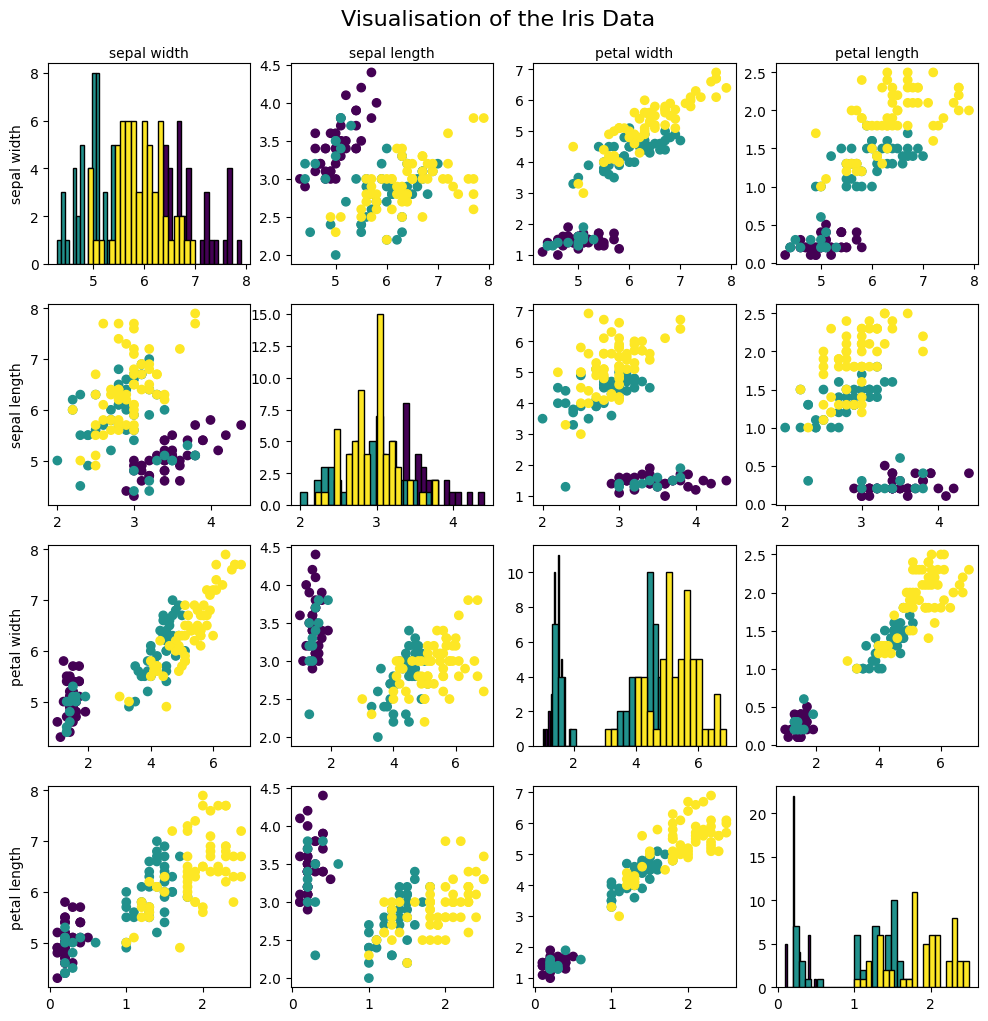

In [19]:
# Run this cell to create the plot for the data you created
show_scatterplot_matrix(irisX, cluster_ids, feature_names, title="Visualisation of the Iris Data")

<div class="alert alert-block alert-info" style="color:black"><h2>Activity 4: Creating a general cluster and visualise function</h2>
    <h3><b>100 marks</b> - using the marking scheme below</h3>
    This activity brings all of the previous activities and code together to create a general function for clustering and visualising data.<br><br>
    You are provided with a <code>cluster_and_visualise()</code> function definition. It has 3 arguments:
    <ol>
        <li><code>datafile_name</code> - A path to a file which contains the data that should be clustered with K-means.</li>
        <li><code>K</code> - The number of clusters to use with K-means.</li>
        <li><code>feature_names</code> - A list of feature names in the data, for labelling the plots.</li>
    </ol>
    <br>
    Your task is to complete this function so that it:
    <ol>
        <li>Reads in a dataset from a file. You should use <code>numpy.genfromtxt()</code> for this.</li>
        <li>Runs K-means on the data to get a set of  cluster labels for the data points.</li>
        <li>Create a 2D visualisation of the results with:
            <ul>
                <li>A title that <b>must</b> include your UWE username and number of clusters e.g. <i>'Visualisation of 4 clusters by j4-smith'</i>.<br>
                The number of clusters should be shown as a number separated by white space (e.g. <i>' 4 clusters'</i> not <i>'4clusters'</i> or <i>' four clusters'</i>).<br>
                    You will not know the number of clusters in advance so will have to create your title in your code using the value of K. </li>
                <li>Labels for the axes.</li>
                <li>Different colour markers for each cluster.</li>
            </ul>
        </li>
        <li>Write the visualisation to a file called <i>'myVisualisation.jpg'</i></li>
    </ol>
    <b>How to get started:</b>
    <ol>
        <li>Read the <a href"https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html">documentation</a> on <code>numpy.genfromtxt()</code> and write some code (1 line) to read in the file from the parameter <code>datafile_name</code>.</li>
        <li>Put the code snippets from previous activities for clustering and creating visualisations into the function in the code cell below.</li>
        <li>You can run the second cell below to self-assess your code and improve it according to the marking scheme below.</li>
        <li><b>Do not</b> change the method definition<code> def cluster_and_visualise(datafile_name:string, K:int, feature_names:list):</code> and your code <b>must</b> return the matplotlib fig and axs objects.</li>
    </ol>
</div>

<div class="alert alert-block alert-success" style="color:black"><b>Hints:</b> 
    <ul>
        <li>The second cell below loads the 'fruit data' example from the lectures. You can use this to test your code and visualisation. But <b>your code will be tested on different datasets</b>, so you should keep it general (i.e. don't hard code variables).</li>
        <li>When using <code>numpy.genfromtxt()</code> you will need to specify the <code>delimiter</code> argument. This specifies how the data points in the file are being separated. <b>In this case the values will be separated with a comma.</b></li>
        <li>Suggest you write and test your code one step at a time e.g. make sure you are correctly reading in the data first, <i>then</i> run K-means, etc.</li>
        <li>To maximise your marks refer to the full marking scheme below. For example, to get high marks you will need to create a scatter plot matrix similar to activity 3.</li>
    </ul>
</div>

<div class="alert alert-block alert-danger" style="color:black">
    <h3>The marking system will just expect you to submit a file called <i>clusterandvisualise.py</i></h3>
    It will <b>not</b> accept the jupyter notebook.<br>
    To help you with that, and demonstrate a useful feature of Jupyter:
    <ul> 
        <li>The <code>%%writefile</code> command at the top of first code cell (where you develop your answer) writes all the content below to file when you run it.</li>
        <li>Then the next one imports your code and tests it.</li>
        <li><b>The python file that is being created and written is what you submit for marking.<b></li>
    </ul>
</div>

## Marking scheme for your visualisation
| Mark         | 0                                                                      | 10                                                                                                                      | 20                                                                                                                     | 30                                                                                                                                       | 40                                                                                                                   | 50                                                                                                                                                                      |
|--------------|------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Content      | Code does not run  OR  no image file produced, OR  image file is empty | Basic scatter plot of two features. Data not coloured by clusters.                                                      | Basic scatter-plot only showing two features.    Some different colours for data markers but no evidence of clustering |  Matrix of scatterplots for different combinations of features.    Some different colours for data markers but no evidence of clustering |  Matrix of scatter-plots for different combinations of features.    Marker colours show appropriate     clusters.    |  Matrix of scatter-plots for different combinations of features.    Diagonals in matrix show histogram plots for variables  Marker colours show appropriate    clusters |
| Presentation | Code does not run  OR  no image file produced, OR  image file is empty | No figure title or labels on axes  OR  Plot is not appropriate size  OR  Data markers are not visible and suitable size |  Appropriate figure title    OR  feature names used to label axes, but not both                                        |  Appropriate figure title    AND  feature names used to label axes                                                                       |  Clearly differentiated markers display data with assignment to clusters. Appropriate figure title  and axis labels. |  Well presented fully self-explanatory visualisation with good use of colour and marker styles and sizes.                                                               |

In [20]:
%%writefile 'studentcode/student_wb5.py'
# DO NOT change anything except within the function
from approvedimports import *

def cluster_and_visualise(datafile_name:str, K:int, feature_names:list):
    """Function to get the data from a file, perform K-means clustering and produce a visualisation of results.

    Parameters
    ----------
    datafile_name: str
        path to data file

    K: int
        number of clusters to use
    
    feature_names: list
        list of feature names

    Returns
    ---------
    fig: matplotlib.figure.Figure
        the figure object for the plot
    
    axs: matplotlib.axes.Axes
        the axes object for the plot
    """
    # ====> insert your code below here
    # Read the data from the file
    data = np.genfromtxt(datafile_name, delimiter=',')
    
    # Create and fit K-Means model
    cluster_model = KMeans(n_clusters=K, n_init=10)
    cluster_model.fit(data)
    cluster_ids = cluster_model.predict(data)
    
    # Create scatter plot matrix
    num_feat = data.shape[1]
    fig, axs = plt.subplots(num_feat, num_feat, figsize=(12, 12))
    plt.set_cmap('viridis')
    
    # Get colors for histograms
    hist_colors = plt.get_cmap('viridis', K).colors
    
    # Loop over feature pairs for scatter plots and histograms
    for feature1 in range(num_feat):
        axs[feature1, 0].set_ylabel(feature_names[feature1])
        axs[0, feature1].set_xlabel(feature_names[feature1])
        axs[0, feature1].xaxis.set_label_position('top')
        
        for feature2 in range(num_feat):
            x_data = data[:, feature1]
            y_data = data[:, feature2]
            
            if feature1 != feature2:
                # Plot scatter for off-diagonal
                axs[feature1, feature2].scatter(x_data, y_data, c=cluster_ids, cmap='viridis', s=50, marker='x')
            else:
                # Plot histogram for diagonal, split by cluster
                inds = np.argsort(cluster_ids)
                sorted_ids = cluster_ids[inds]
                sorted_data = x_data[inds]
                splits = np.split(sorted_data, np.unique(sorted_ids, return_index=True)[1][1:])
                
                for i, split in enumerate(splits):
                    axs[feature1, feature2].hist(split, bins=20, color=hist_colors[i], edgecolor='black', alpha=0.7)
    
    # Set title with username and K
    fig.suptitle(f'Visualisation of {K} clusters by j4-smith', fontsize=16, y=0.925)
    
    # Save the visualization
    plt.savefig('myVisualisation.jpg', bbox_inches='tight')
    
    return fig, axs
    # <==== insert your code above here


Overwriting studentcode/student_wb5.py


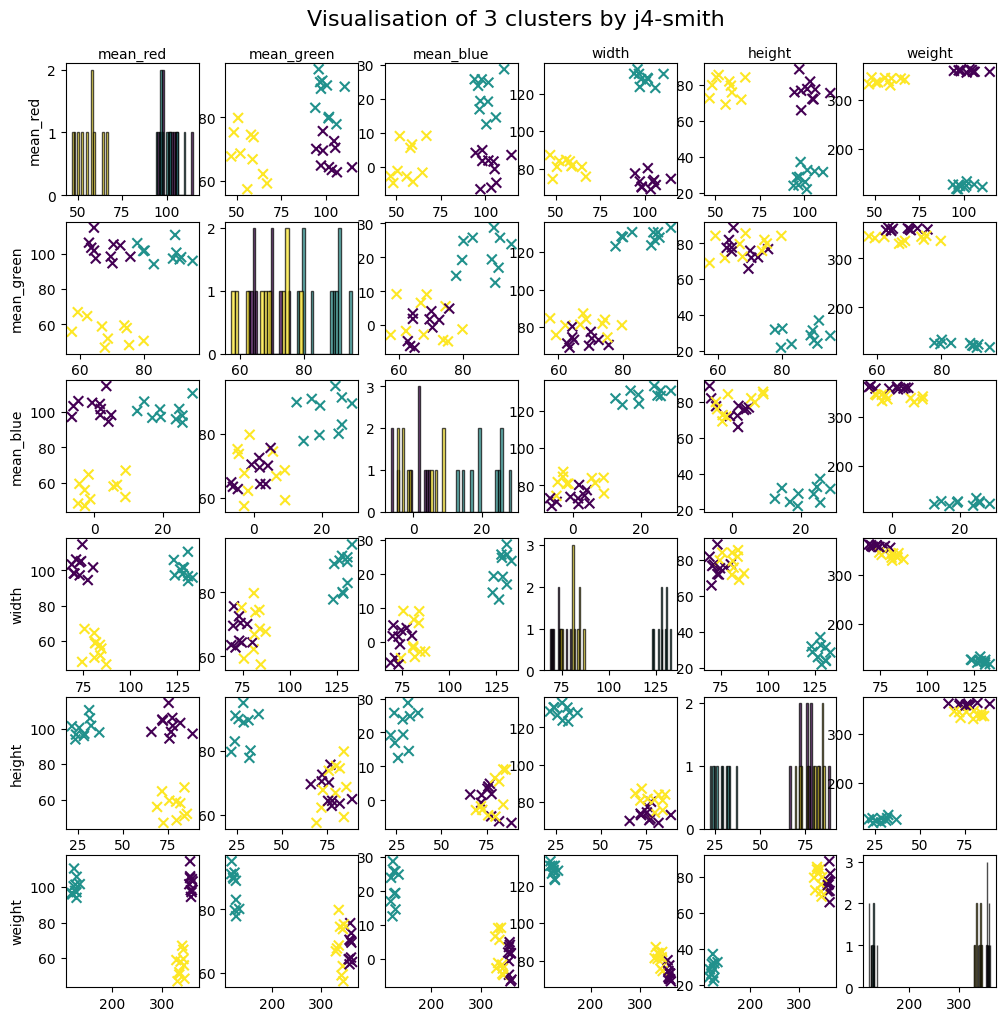

In [21]:
# provide details of sample data set to use for testing
fruit_featurenames = ('mean_red', 'mean_green', 'mean_blue','width', 'height', 'weight')
fruit_datafile = 'data/fruit_values.csv'

#set up paths and reload latest version of your code
from sys import path
from importlib import reload

if 'studentcode' not in path:
    path.append('./studentcode')
import student_wb5
reload(student_wb5)  

# now run your code with the apple-banana-oranges dataset
from student_wb5 import cluster_and_visualise

_, _ = cluster_and_visualise(fruit_datafile, 3, fruit_featurenames) 

<div class="alert alert-block alert-success" style="color:black"><b>Save and close Jupyter:</b>
    <ol>
        <li>Use the jupyterlab functions to download your work (ask your tutor if you need help with this) and save it somewhere sensible so you can find it easily.</li>
        <li>Shutdown the notebook when you have finished with this tutorial (menu->file->close and shutdown notebook)</li>
    </ol>
</div